# Netflix Financial Statement Analysis 

An analysis of Netflix's financial performance and trends using Python and data from Yahoo Finance.

They key focus of this analysis is: 
- Profitablity
- Leverage
- Growth
- Liqudity
- Cash Flow

# Imports and Setup 

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Set plot style
sns.set(style='whitegrid')


# Load Financial Data

In [5]:
nflx = yf.Ticker("NFLX")

# Fetch core financial statements (transpose "T" so that row=years columns= financials)
income_statement = nflx.financials.T
balance_sheet = nflx.balance_sheet.T
cash_flow = nflx.cashflow.T



## Preview Data 

In [7]:
# Preview Data 
display(income_statement.head())
display(balance_sheet.head())
display(cash_flow.head())


,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Operating Expense,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2024-12-31,0.0,0.13,26314821000.0,8711631000.0,15630431000.0,21038464000.0,26314821000.0,10684390000.0,-451957000.0,718733000.0,...,7544888000.0,2925295000.0,4619593000.0,2917554000.0,1702039000.0,1702039000.0,17962502000.0,21038464000.0,39000966000.0,39000966000.0
2023-12-31,0.0,0.13,21508387000.0,5407990000.0,14554384000.0,19715368000.0,21508387000.0,6954003000.0,-748598000.0,748598000.0,...,7053926000.0,2675758000.0,4378168000.0,2657883000.0,1720285000.0,1720285000.0,14007929000.0,19715368000.0,33723297000.0,33723297000.0
2022-12-31,0.0,0.15,20332955000.0,4491924000.0,14362814000.0,19168285000.0,20332955000.0,5970141000.0,-368902000.0,706212000.0,...,6814434000.0,2711041000.0,4103393000.0,2530502000.0,1572891000.0,1572891000.0,12447265000.0,19168285000.0,31615550000.0,31615550000.0
2021-12-31,0.0,0.12,19044502000.0,5116228000.0,12438779000.0,17332683000.0,19044502000.0,6605723000.0,-354406000.0,765620000.0,...,6170652000.0,2273885000.0,3896767000.0,2545146000.0,1351621000.0,1351621000.0,12365161000.0,17332683000.0,29697844000.0,29697844000.0


,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Common Stock Equity,...,Other Current Assets,Prepaid Assets,Receivables,Taxes Receivable,Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
2024-12-31,24784254.0,427757100.0,452541354.0,7778071000.0,15582804000.0,-7708895000.0,40326371000.0,2344979000.0,-7708895000.0,24743567000.0,...,1096412000.0,431924000.0,1988304000.0,653000000.0,1335304000.0,9583739000.0,1779006000.0,7804733000.0,2940526000.0,4864207000.0
2023-12-31,16078268.0,432759584.0,448837852.0,7426348000.0,14543261000.0,-11069743000.0,35131574000.0,1057478000.0,-11069743000.0,20588313000.0,...,529257000.0,408936000.0,1842054000.0,555000000.0,1287054000.0,7137886000.0,20973000.0,7116913000.0,1130284000.0,5986629000.0
2022-12-31,1564478.0,445346776.0,446911254.0,9205900000.0,14353076000.0,-11959312000.0,35130477000.0,1335499000.0,-11959312000.0,20777401000.0,...,1228388000.0,392735000.0,1586898000.0,598000000.0,988898000.0,6058452000.0,911276000.0,5147176000.0,1075592000.0,4071584000.0
2021-12-31,1564478.0,443963107.0,445527585.0,9365091000.0,15392895000.0,-15070291000.0,31242143000.0,-419141000.0,-15070291000.0,15849248000.0,...,913883000.0,323818000.0,804320000.0,NaN,804320000.0,6027804000.0,0.0,6027804000.0,1924191000.0,4103613000.0
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,...,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Amortization Cash Flow,Amortization Of Intangibles,Depreciation,Operating Gains Losses,Net Foreign Currency Exchange Gain Loss,Net Income From Continuing Operations
2024-12-31,6921826000.0,-6263746000.0,-400000000.0,1794460000.0,832887000.0,-439538000.0,674502000.0,1641530000.0,7807337000.0,7118515000.0,...,-590698000.0,-590698000.0,15630431000.0,15630431000.0,15301517000.0,15301517000.0,328914000.0,-121539000.0,-121539000.0,8711631000.0
2023-12-31,6925749000.0,-6045347000.0,0.0,0.0,169990000.0,-348552000.0,684504000.0,1154973000.0,7118515000.0,5170582000.0,...,-459359000.0,-459359000.0,14554384000.0,14554384000.0,14197437000.0,14197437000.0,356947000.0,176296000.0,176296000.0,5407990000.0
2022-12-31,1618528000.0,0.0,-700000000.0,0.0,35746000.0,-407729000.0,701693000.0,811720000.0,5170582000.0,6055111000.0,...,-166550000.0,-166550000.0,14362814000.0,14362814000.0,14026132000.0,14026132000.0,336682000.0,-353111000.0,-353111000.0,4491924000.0
2021-12-31,-131975000.0,-600022000.0,-500000000.0,0.0,174414000.0,-524585000.0,763432000.0,509265000.0,6055111000.0,8238870000.0,...,199548000.0,199548000.0,12438779000.0,12438779000.0,12230367000.0,12230367000.0,208412000.0,-430661000.0,-430661000.0,5116228000.0
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Explore and Clean Data 

Check the columns for each dataset. 

Keep important columns related to KPI's and removing unnecessary columns.

In [10]:
print("Income Statement Columns:\n", income_statement.columns)
print("\nBalance Sheet Columns:\n", balance_sheet.columns)
print("\nCash Flow Columns:\n", cash_flow.columns)


Income Statement Columns:
 Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Total Operating Income As Reported',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Net Income',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Net Non Operating Interest Income Expense',
       'Interest Expense Non Operating', 'Interest Income Non Operating',
       'Operating Income', 'Operating Expense', 'Research And Dev

In [154]:
# Cleaned Income Statement
income_clean = income_statement[[
    'Total Revenue',
    'Gross Profit',
    'Operating Income',
    'Net Income',
    'EBIT',
    'Interest Expense'
]].rename(columns={
    'Total Revenue': 'revenue',
    'Gross Profit': 'gross_profit',
    'Operating Income': 'operating_income',
    'Net Income': 'net_income',
    'EBIT': 'ebit',
    'Interest Expense': 'interest_expense'
})

# Cleaned Balance Sheet
balance_clean = balance_sheet[[
    'Total Assets',
    'Total Liabilities Net Minority Interest',
    'Stockholders Equity',
    'Cash And Cash Equivalents',
    'Current Assets',
    'Current Liabilities'
]].rename(columns={
    'Total Assets': 'total_assets',
    'Total Liabilities Net Minority Interest': 'total_liabilities',
    'Stockholders Equity': 'equity',
    'Cash And Cash Equivalents': 'cash',
    'Current Assets': 'current_assets',
    'Current Liabilities': 'current_liabilities'
})

# Cleaned Cash Flow
cashflow_clean = cash_flow[[
    'Operating Cash Flow',
    'Capital Expenditure',
    'Free Cash Flow' if 'Free Cash Flow' in cash_flow.columns else 'Capital Expenditure'
]].rename(columns={
    'Operating Cash Flow': 'operating_cash_flow',
    'Capital Expenditure': 'capex'
})

# Calculate Free Cash Flow 
if 'free_cash_flow' not in cashflow_clean.columns:
    cashflow_clean['free_cash_flow'] = cashflow_clean['operating_cash_flow'] + cashflow_clean['capex']


### Check index and date range to verify how many years are covered in the data 

In [13]:
print("Income Statement Dates:\n", income_clean.index)
print("Balance Statemet Dates: \n", balance_clean.index)
print("Cashflow Statement Dates: \n", cashflow_clean.index)

Income Statement Dates:
 DatetimeIndex(['2024-12-31', '2023-12-31', '2022-12-31', '2021-12-31'], dtype='datetime64[ns]', freq=None)
Balance Statemet Dates: 
 DatetimeIndex(['2024-12-31', '2023-12-31', '2022-12-31', '2021-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq=None)
Cashflow Statement Dates: 
 DatetimeIndex(['2024-12-31', '2023-12-31', '2022-12-31', '2021-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq=None)


In [14]:
# Drop the row with missing values for 2020-12-31
balance_clean = balance_clean.drop(pd.to_datetime("2020-12-31"), errors='ignore')

# Drop the row for 2020-12-421 for cashflow
cashflow_clean= cashflow_clean.drop(pd.to_datetime("2020-12-31"),errors='ignore')


### Check for nulls

In [17]:
print("Missing values (Income):\n", income_clean.isna().sum())
print("\nMissing values (Balance):\n", balance_clean.isna().sum())
print("\nMissing values (Cash Flow):\n", cashflow_clean.isna().sum())


Missing values (Income):
 revenue             0
gross_profit        0
operating_income    0
net_income          0
ebit                0
interest_expense    0
dtype: int64

Missing values (Balance):
 total_assets           0
total_liabilities      0
equity                 0
cash                   0
current_assets         0
current_liabilities    0
dtype: int64

Missing values (Cash Flow):
 operating_cash_flow    0
capex                  0
Free Cash Flow         0
free_cash_flow         0
dtype: int64


## Combine DataFrames

In [20]:
# Ensure all DataFrames are sorted
income_clean = income_clean.sort_index()
balance_clean = balance_clean.sort_index()
cashflow_clean = cashflow_clean.sort_index()

# Recombine
financials = pd.concat([income_clean, balance_clean, cashflow_clean], axis=1)
financials.index.name = "date"
financials = financials.sort_index(ascending=True)


# Preview the final cleaned dataset
display(financials)


,revenue,gross_profit,operating_income,net_income,ebit,interest_expense,total_assets,total_liabilities,equity,cash,current_assets,current_liabilities,operating_cash_flow,capex,Free Cash Flow,free_cash_flow
date,,,,,,,,,,,,,,,,
2021-12-31,29697844000.0,12365161000.0,6194509000.0,5116228000.0,6605723000.0,765620000.0,44584663000.0,28735415000.0,15849248000.0,6027804000.0,8069825000.0,8488966000.0,392610000.0,-524585000.0,-131975000.0,-131975000.0
2022-12-31,31615550000.0,12447265000.0,5632831000.0,4491924000.0,5970141000.0,706212000.0,48594768000.0,27817367000.0,20777401000.0,5147176000.0,9266473000.0,7930974000.0,2026257000.0,-407729000.0,1618528000.0,1618528000.0
2023-12-31,33723297000.0,14007929000.0,6954003000.0,5407990000.0,6954003000.0,748598000.0,48731992000.0,28143679000.0,20588313000.0,7116913000.0,9918133000.0,8860655000.0,7274301000.0,-348552000.0,6925749000.0,6925749000.0
2024-12-31,39000966000.0,17962502000.0,10417614000.0,8711631000.0,10684390000.0,718733000.0,53630374000.0,28886807000.0,24743567000.0,7804733000.0,13100379000.0,10755400000.0,7361364000.0,-439538000.0,6921826000.0,6921826000.0


# Profitability Analysis

We'll calculate and visualize the following metrics:

- Gross Margin = Gross Profit / Revenue

- Operating Margin = Operating Income / Revenue

- Net Margin = Net Income / Revenue

- Return on Assets (ROA) = Net Income / Total Assets

- Return on Equity (ROE) = Net Income / Equity

In [24]:
# Calculate profitability ratios
financials['gross_margin'] = financials['gross_profit'] / financials['revenue']
financials['operating_margin'] = financials['operating_income'] / financials['revenue']
financials['net_margin'] = financials['net_income'] / financials['revenue']
financials['roa'] = financials['net_income'] / financials['total_assets']
financials['roe'] = financials['net_income'] / financials['equity']

# Optional: round for easier reading
financials[['gross_margin', 'operating_margin', 'net_margin', 'roa', 'roe']] = financials[[
    'gross_margin', 'operating_margin', 'net_margin', 'roa', 'roe'
]].round(3)


## Vizualize the Trends 

In [26]:
#Reusable plot function

def plot_trend(data, column, title, ylabel):
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=data.index.year, y=data[column], marker="o")
    plt.title(title, fontsize=14)
    plt.ylabel(ylabel)
    plt.xlabel("Year")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


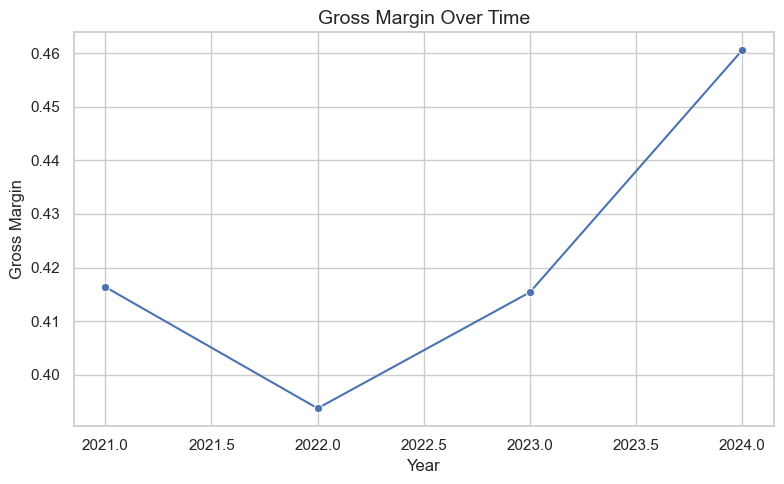

In [27]:
plot_trend(financials, 'gross_margin', 'Gross Margin Over Time', 'Gross Margin')



### Gross Margin Over Time

Gross margin represents the percentage of revenue that Netflix retains after covering the cost of producing its content. 

Between 2021 and 2022, gross margin declined slightly, suggesting increased content production or licensing costs. However, from 2022 to 2024, gross margin improved significantly, reaching over 46%. 

This rebound implies that Netflix became more efficient in controlling production costs or better monetized its content, strengthening its core business profitability.


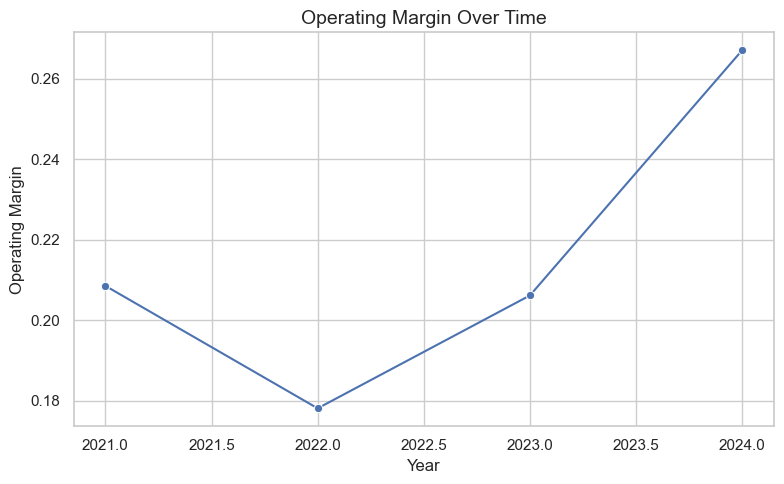

In [28]:
plot_trend(financials, 'operating_margin', 'Operating Margin Over Time', 'Operating Margin')


### Operating Margin Over Time

Operating margin measures how much profit Netflix generates from its operations after accounting for overhead costs such as marketing, R&D, and administrative expenses.

A dip in 2022 followed by a sharp increase through 2024 indicates that Netflix tightened its cost structure while scaling operations. By 2024, operating margin surpassed 26%, reflecting stronger cost discipline and improved operational efficiency.


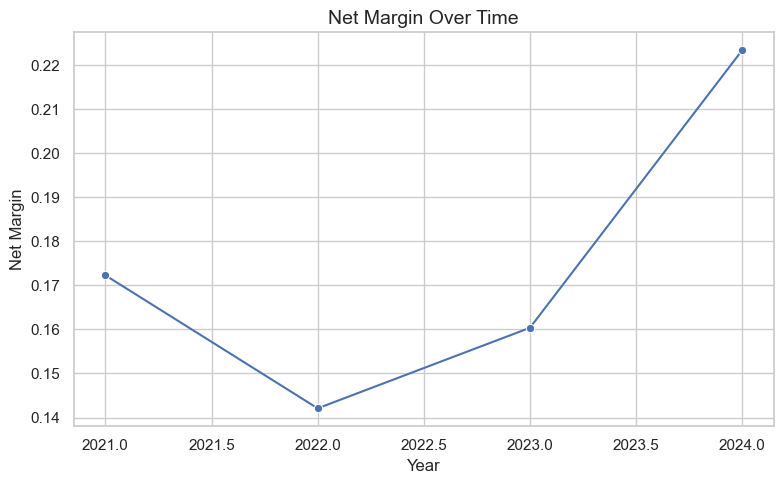

In [29]:
plot_trend(financials, 'net_margin', 'Net Margin Over Time', 'Net Margin')

### Net Margin Over Time

Net margin reflects Netflix’s bottom-line profitability — the portion of revenue that becomes actual profit after all expenses, including interest and taxes.

While net margin dipped in 2022 (~14.3%), it rose steadily and reached over 22% by 2024. This indicates not only operational improvements but also more effective financial management (e.g., debt costs or taxes being controlled).


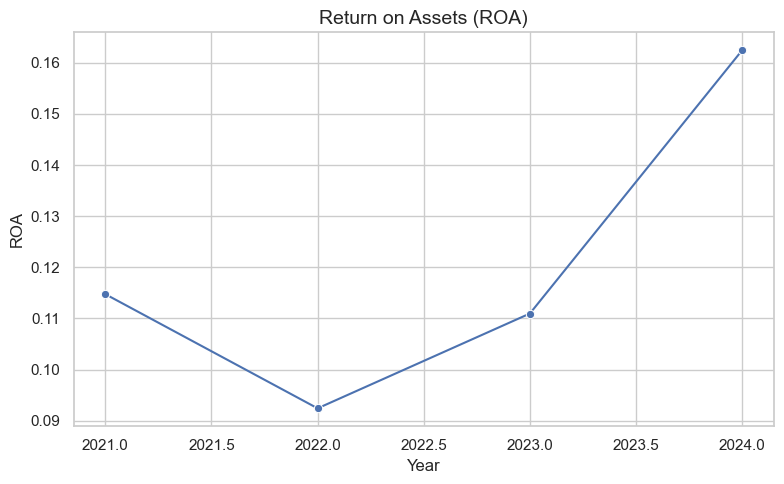

In [30]:
plot_trend(financials, 'roa', 'Return on Assets (ROA)', 'ROA')

###  Return on Assets (ROA)

ROA shows how effectively Netflix is using its total assets to generate profit. 

The increase from ~9.2% in 2022 to over 16% in 2024 suggests that Netflix became more productive with its asset base, likely driven by better utilization of cash, content assets, and infrastructure.


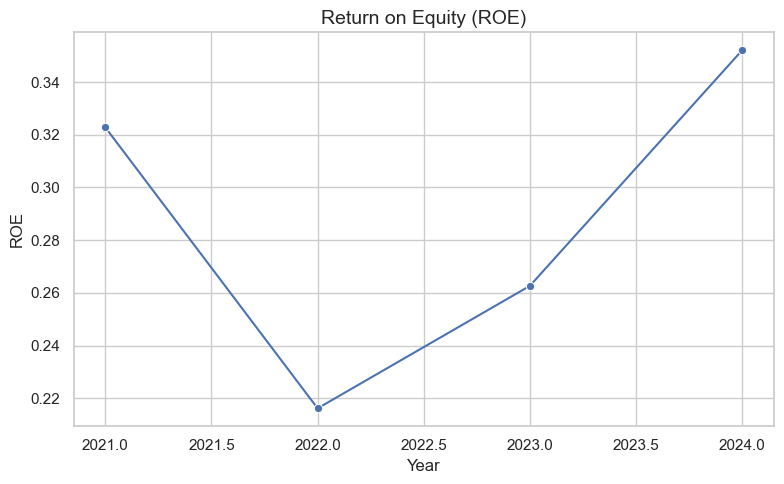

In [31]:
plot_trend(financials, 'roe', 'Return on Equity (ROE)', 'ROE')

### Return on Equity (ROE)

ROE measures how much profit Netflix is generating for each dollar of shareholder equity. 

Despite a dip in 2022, ROE rebounded significantly, reaching nearly 35% in 2024. This is a strong indicator of value creation for shareholders and suggests that Netflix is leveraging its capital structure effectively to maximize investor returns.


# Leverage & Solvency Analysis

We'll calculate and visualize the following metrics:

- Debt-to-Equity Ratio = Total Liabilities / Equity

- Equity Multiplier = Total Assets / Equity

- Interest Coverage Ratio = EBIT / Interest Expense

In [58]:
# Debt to Equity = Total Liabilities / Shareholders' Equity
financials['debt_to_equity'] = financials['total_liabilities'] / financials['equity']

# Equity Multiplier = Total Assets / Shareholders' Equity
financials['equity_multiplier'] = financials['total_assets'] / financials['equity']

# Interest Coverage = EBIT / Interest Expense
financials['interest_coverage'] = financials['ebit'] / financials['interest_expense']

# Round for readability
financials[['debt_to_equity', 'equity_multiplier', 'interest_coverage']] = financials[
    ['debt_to_equity', 'equity_multiplier', 'interest_coverage']
].round(2)


## Visualize Trends

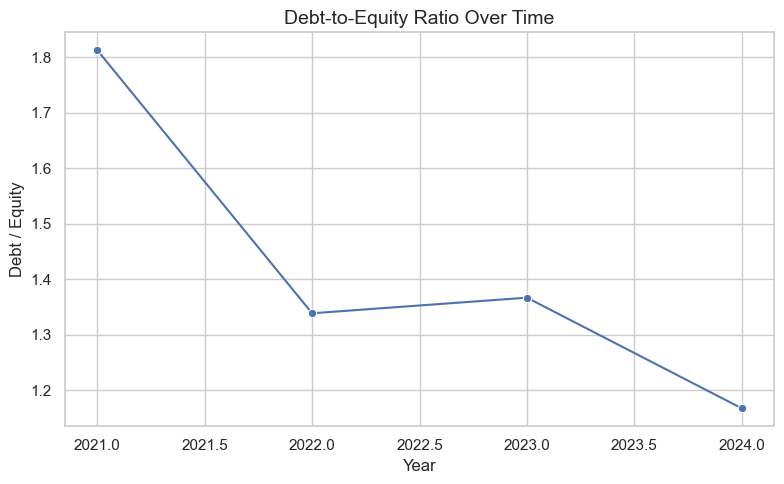

In [61]:
# Reuse our plot function
plot_trend(financials, 'debt_to_equity', 'Debt-to-Equity Ratio Over Time', 'Debt / Equity')



### Debt-to-Equity Ratio Over Time

This ratio measures how much debt Netflix uses to finance its operations relative to equity.

In 2021, Netflix had a high leverage position (1.81x), relying heavily on debt. By 2024, the ratio fell to 1.17x — showing that Netflix reduced its financial risk and moved toward a healthier capital structure with a better balance between debt and equity.


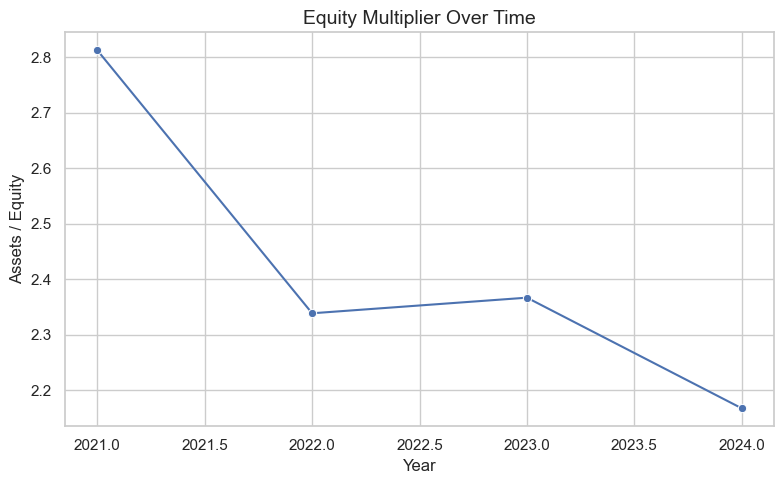

In [63]:
plot_trend(financials, 'equity_multiplier', 'Equity Multiplier Over Time', 'Assets / Equity')

### Equity Multiplier Over Time

The equity multiplier shows the degree of financial leverage by comparing total assets to shareholder equity.

Netflix’s equity multiplier declined from 2.8 in 2021 to 2.17 in 2024. This trend confirms that Netflix is using less debt to finance assets, signaling reduced financial risk and stronger reliance on equity to support its growth.


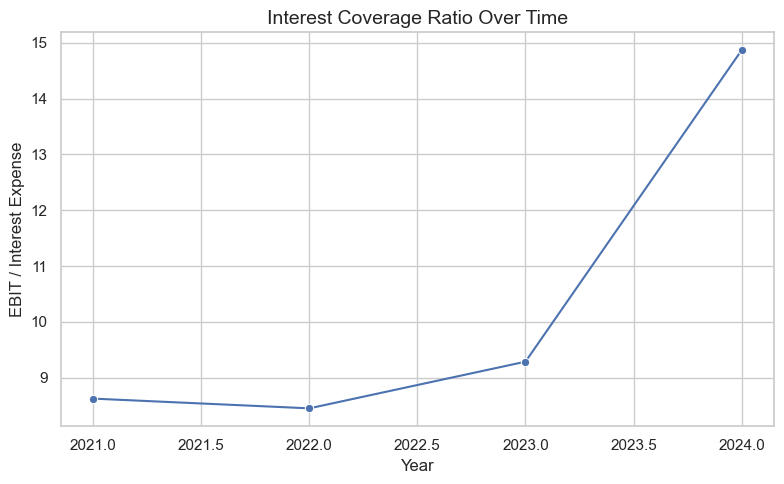

In [65]:
plot_trend(financials, 'interest_coverage', 'Interest Coverage Ratio Over Time', 'EBIT / Interest Expense')


### Interest Coverage Ratio Over Time

This ratio shows how easily Netflix can pay interest on outstanding debt from its operating profits (EBIT).

The increase from 8.6x in 2021 to nearly 15x in 2024 reflects a major improvement in Netflix’s ability to service its debt. This is a strong indicator of financial health and suggests that the company is well positioned to handle economic or interest rate changes.


# Growth Analysis

We'll calculate and visualize:

- Revenue Growth YoY

- Net Income Growth YoY

- Free Cash Flow Growth YoY



In [86]:
# Revenue and Net Income Growth
financials['revenue_growth'] = financials['revenue'].pct_change()
financials['net_income_growth'] = financials['net_income'].pct_change()
financials['fcf_growth'] = financials['free_cash_flow'].pct_change()

#Round for readability 
financials[['revenue_growth', 'net_income_growth', 'fcf_growth']] = financials[[
    'revenue_growth', 'net_income_growth', 'fcf_growth'
]].round(3)


## Visualize Trends 

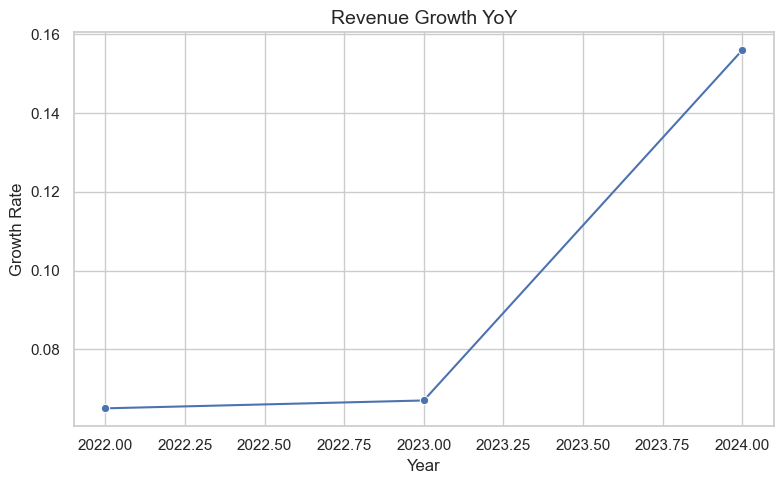

In [89]:
plot_trend(financials, 'revenue_growth', 'Revenue Growth YoY', 'Growth Rate')

### Revenue Growth YoY

Netflix’s revenue grew modestly between 2022 and 2023 (~5.6%), followed by a stronger acceleration of 15.7% in 2024.

This rebound suggests stronger subscriber engagement, potential pricing power, and effective monetization strategies.

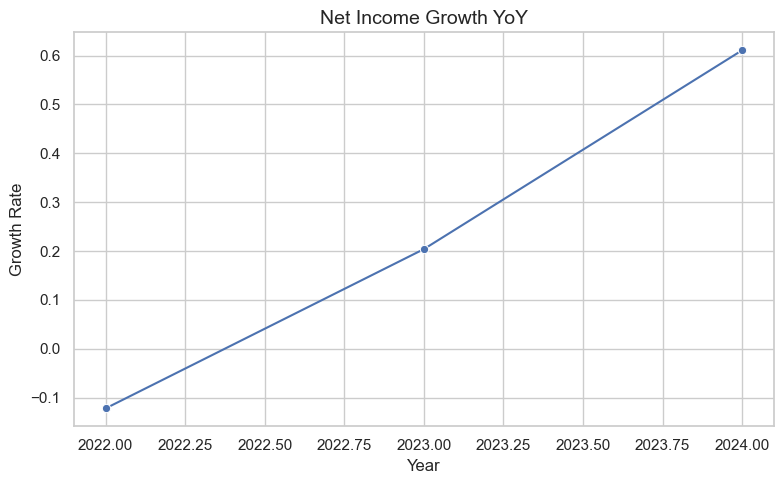

In [91]:
plot_trend(financials, 'net_income_growth', 'Net Income Growth YoY', 'Growth Rate')

### Net Income Growth YoY

Netflix saw a decline in net income in 2022 (~−11%), likely due to rising costs or interest payments. However, profitability surged in 2023 and 2024, with over 60% net income growth in the latest year.

This shows that the company is effectively converting revenue into profit, likely through margin expansion and operational efficiency.


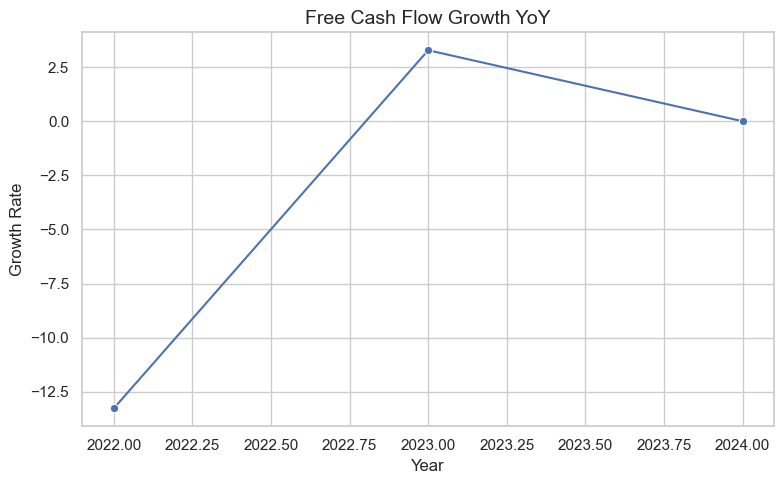

In [93]:
plot_trend(financials, 'fcf_growth', 'Free Cash Flow Growth YoY', 'Growth Rate')

### Free Cash Flow Growth YoY

Free Cash Flow (FCF) dropped in 2022 but rebounded significantly in 2023, reflecting improved cash management and reduced capital intensity. The plateau in 2024 suggests Netflix may be reinvesting cash or facing a normalization after a strong prior year.

This volatility is expected in content-heavy businesses, but the return to positive FCF is a strong financial indicator.


# Liquidity & Cash Flow Analysis 

We'll calculate and visualize:

- Current Ratio = Current Assets / Current Liabilities

- Quick Ratio = (Cash + Short-term Investments) / Current Liabilities

- Operating Cash Flow to Current Liabilities = OCF / Current Liabilities

- Free Cash Flow Trend 



In [113]:
# Current Ratio = Current Assets / Current Liabilities
financials['current_ratio'] = financials['current_assets'] / financials['current_liabilities']

# Quick Ratio = Cash / Current Liabilities (assumes no inventory data)
financials['quick_ratio'] = financials['cash'] / financials['current_liabilities']

# OCF to Current Liabilities = Operating Cash Flow / Current Liabilities
financials['ocf_to_liabilities'] = financials['operating_cash_flow'] / financials['current_liabilities']

# Round for clarity
financials[['current_ratio', 'quick_ratio', 'ocf_to_liabilities']] = financials[[
    'current_ratio', 'quick_ratio', 'ocf_to_liabilities'
]].round(2)

## Visualize Trends 

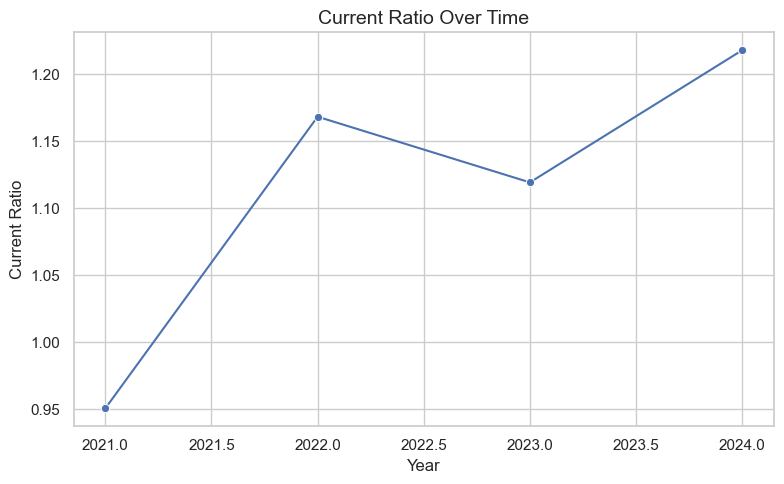

In [104]:
plot_trend(financials, 'current_ratio', 'Current Ratio Over Time', 'Current Ratio')

### Current Ratio

Netflix’s current ratio increased from ~0.95 in 2021 to over 1.2 in 2024, showing improved ability to cover short-term obligations. This is a positive liquidity signal, suggesting Netflix is managing working capital more effectively over time.


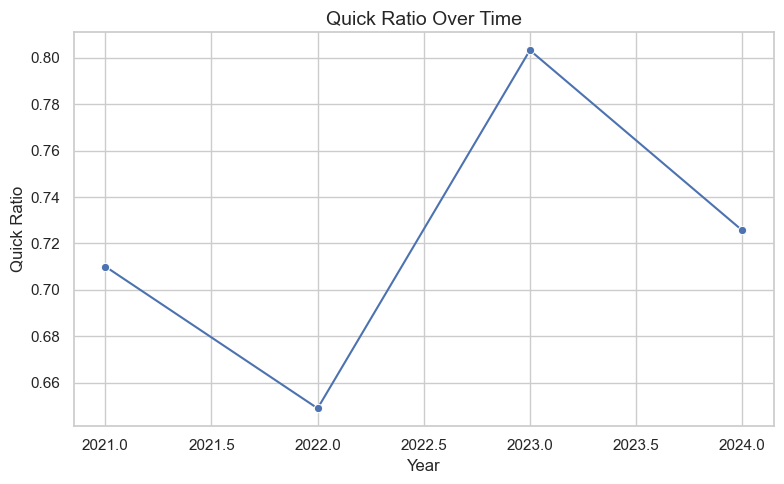

In [106]:
plot_trend(financials, 'quick_ratio', 'Quick Ratio Over Time', 'Quick Ratio')

### Quick Ratio

Although the quick ratio remains below 1.0, it improved from ~0.65 to 0.73 by 2024. This shows that while Netflix doesn’t maintain a large cash buffer, its liquidity position is gradually strengthening, which is reasonable for a subscription-based business.


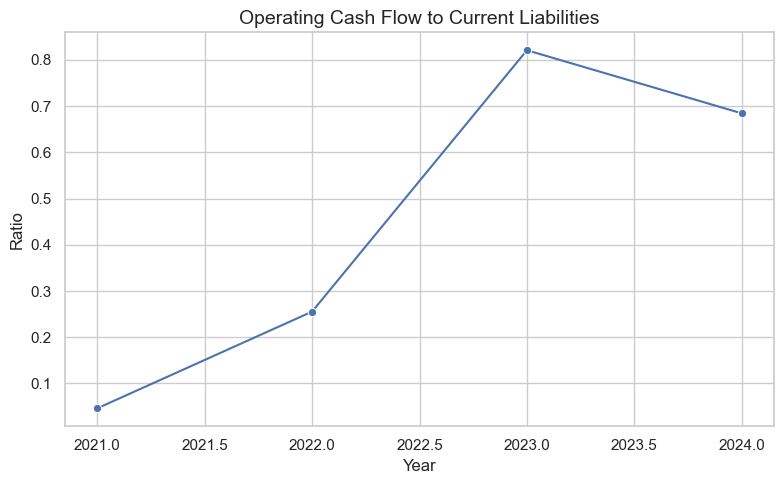

In [115]:
plot_trend(financials, 'ocf_to_liabilities', 'Operating Cash Flow to Current Liabilities', 'Ratio')

### Operating Cash Flow to Liabilities

This ratio surged from 0.05 in 2021 to 0.82 in 2023, highlighting that Netflix can cover the majority of its short-term liabilities using just operating cash flow. Even after a slight decline in 2024, this remains a strong liquidity indicator.


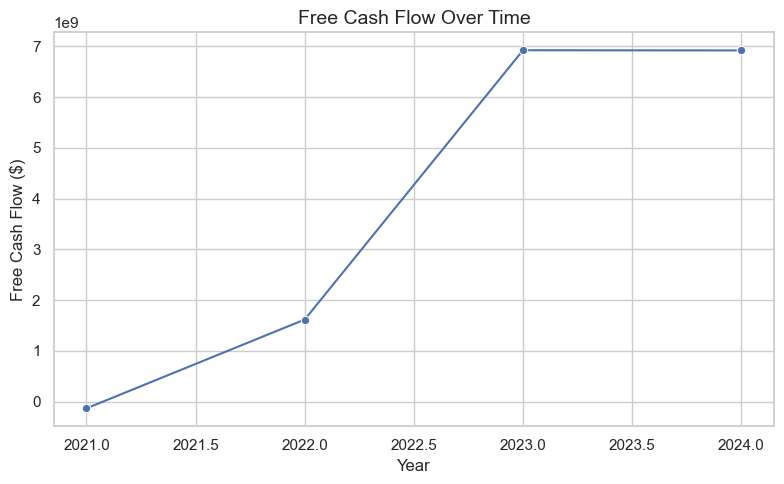

In [110]:
plot_trend(financials, 'free_cash_flow', 'Free Cash Flow Over Time', 'Free Cash Flow ($)')


### Free Cash Flow Over Time

Netflix’s free cash flow trend shows a sharp increase between 2021 and 2023, stabilizing near $7 billion. This demonstrates that Netflix is generating sufficient excess cash to fund operations and potentially return value to shareholders.


# Final Summary

This financial analysis of Netflix from 2021 to 2024 offers a comprehensive look at the company’s profitability, leverage, growth, and liquidity.

**Key Findings:**

- **Profitability:** All major margin metrics (gross, operating, and net) improved significantly post-2022, with ROA and ROE rising, reflecting stronger cost control and asset utilization.
- **Leverage:** Netflix reduced its reliance on debt, shown by falling debt-to-equity and equity multiplier ratios. Interest coverage nearly doubled, signaling stronger solvency.
- **Growth:** Revenue growth rebounded in 2024, and net income growth outpaced it, highlighting operational leverage. Free cash flow became solidly positive, though slightly plateaued.
- **Liquidity:** Liquidity metrics improved overall, with the current ratio surpassing 1.0 and OCF nearly covering short-term liabilities. Quick ratio remains just under 1.0, reflecting a lean cash strategy.

**Conclusion:** Netflix has moved from a high-growth, high-leverage model to a more balanced and sustainable financial structure. Its profitability and liquidity are strengthening, supported by rising margins, free cash flow, and reduced financial risk — making it well-positioned for future growth.